In [1]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

X,y = make_classification(n_samples=100,n_features=2, n_informative=1,
                         n_redundant=0,n_classes=2,n_clusters_per_class=1, random_state=41,
                         hypercube=False, class_sep=20)

In [2]:
X

array([[ 0.51123145, -0.11697552],
       [ 0.06316371, -0.73115232],
       [-0.0425064 , -0.7081059 ],
       [-3.2891569 , -2.01199214],
       [ 0.1111445 ,  1.63493163],
       [-2.53070306,  0.15599044],
       [-3.49036198,  1.07782053],
       [ 0.3976447 ,  0.80626713],
       [-0.24666899,  0.74859527],
       [-3.65803446,  0.75152794],
       [-3.47658131, -0.90114581],
       [-3.47815037, -0.1815243 ],
       [ 0.29004249, -2.98092432],
       [ 1.11761831,  1.20500136],
       [-3.52530398,  0.78302407],
       [ 0.69929128,  0.42968688],
       [ 0.17089733, -0.73229726],
       [-3.57785124, -0.83930476],
       [ 0.12965489,  0.83727062],
       [-3.46888717, -0.10255323],
       [-3.97487212,  0.65867001],
       [-3.76348686,  0.92649819],
       [-3.01519735,  0.10216193],
       [ 1.92241659,  0.46886454],
       [-2.91479578,  0.45432938],
       [ 0.9259563 ,  1.8613386 ],
       [-3.4859014 , -0.79255991],
       [-2.73978345, -1.0004391 ],
       [-4.09896768,

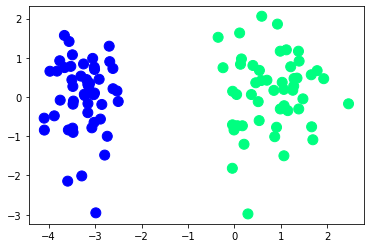

In [3]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.show()

In [4]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(penalty='none',solver='sag')
log.fit(X,y)

LogisticRegression(penalty='none', solver='sag')

In [5]:
print(log.intercept_)
print(log.coef_)

[4.7580364]
[[4.93737043 0.27475868]]


In [6]:
intercept_ = log.intercept_
coef_ = log.coef_.ravel()
coef_

array([4.93737043, 0.27475868])

In [7]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [8]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

In [14]:
def sigmoid(num):
    return 1/(1+np.exp(-num))

def gradient_descent(X,y):
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5
    
    for i in range(5000):
        
        y_hat = sigmoid(np.dot(X,weights)) 
        weights = weights + lr * (np.dot((y-y_hat),X)/X.shape[0])
    
    return weights[0], weights[1:]

In [15]:
intercept_,coef_ = gradient_descent(X,y)
print(intercept_)
print(coef_)

5.833388649053249
[4.83926872 0.21182255]


In [16]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [17]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

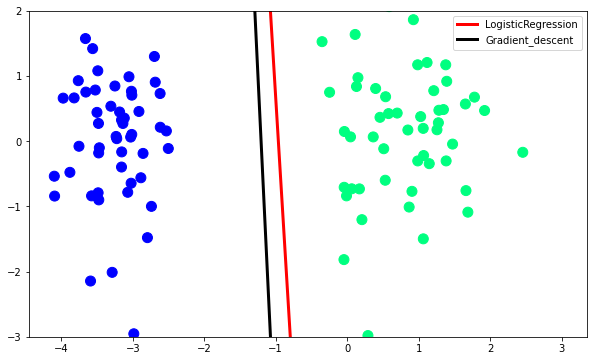

In [18]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3,label='LogisticRegression')
plt.plot(x_input1,y_input1,color='black',linewidth=3,label='Gradient_descent')
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)
plt.legend()
plt.show()